In [ ]:
pip install missingno

In [ ]:
pip install warnings

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Loading the required Data
# Import the train and test data.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [ ]:
# Viewing the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Viewing the test dataset
test.head() #head = view first 5 rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# This is how our end submission is gonna look like.
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
print("Length of the train dataset: ", len(train))
print("Dimensionality of the test dataset: ", test.shape)

Length of the train dataset:  891
Dimensionality of the test dataset:  (418, 11)


In [ ]:
# Data Dictionary
# Survival: 0 = No, 1 = Yes

# pclass (Ticket class): 1 = 1st class, 2 = 2nd class, 3 = 3rd class

# Sex

# Age (in years)

# sibsp: number of siblings / spouses aboard the Titanic

# parch: number of parents / children aboard the Titanic

# ticket: Ticket number

# fare: Passenger fare

# cabin: Cabin number

# embarked (Port of Embarkation): C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# 2. Exploratory Data Analysis

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

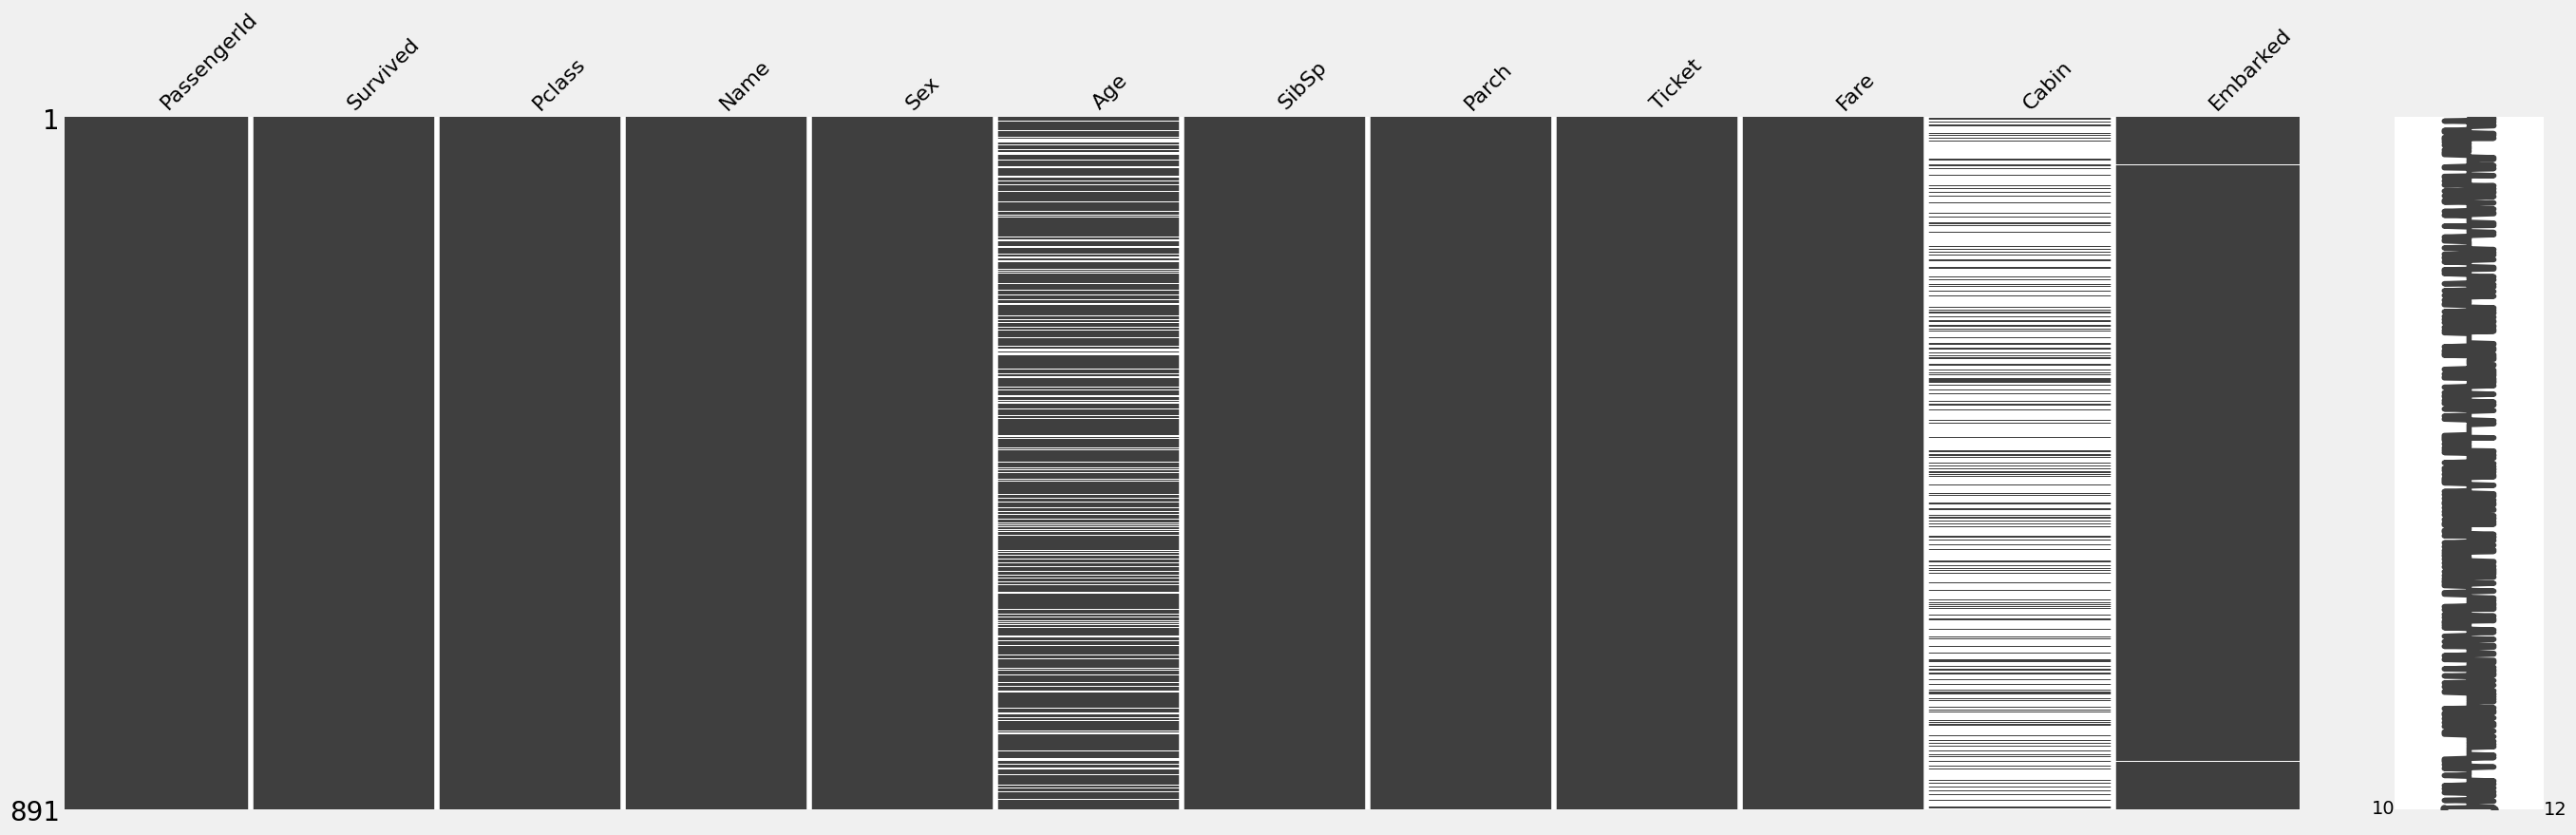

In [ ]:
# To plot a graphic of missing values
missingno.matrix(train,figsize=(30,9))

In [ ]:
# Another method to find missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Create two new dataframes to perform our Data Analysis.
# Keep one for exploring discretised continuous variables (continuous variable which have been sorted into some kind of category) and another for exploring continuous variables.

# Continuous Variables: 0-100 (Here there is no break in between)

# Discretised Continuous Variables: 0-10, 10-20, ..... ,90-100 (Here we are putting them into different bins or intervals)

# We are separating the data so that we can run different types of models over each dataframe.

In [ ]:
df_dis = pd.DataFrame() #For discretised continuous variables
df_con = pd.DataFrame() #For continuous variables

In [ ]:
# What Datatypes are there in the dataframe?
# We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

# However, sometimes the features that we consider as numerical might actually turn out to be categorical.

# The next few steps will help us figure out how to process our data so our machine learning model can learn from it. Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [ ]:
# Datatypes in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


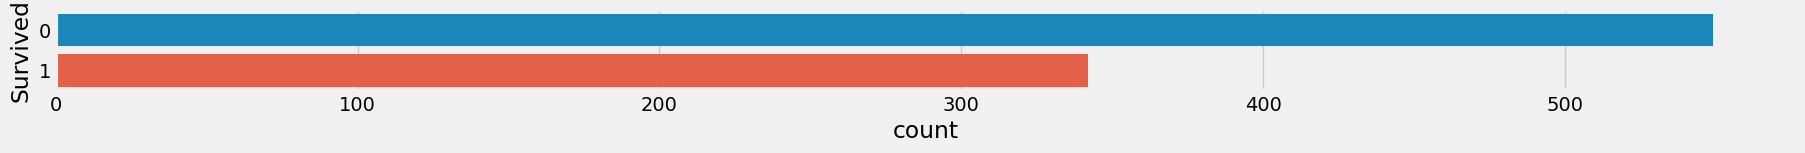

In [ ]:
# How many people has survived the titanic?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived',data=train)
#sns.countplot(x='Survived',data=train)             --> You can use this to get a vertical graph.

print(train['Survived'].value_counts())             ##This will help us see the exact number along with the graph.

In [ ]:
# Let's add the 'Survived' column to our subset dataframes.
df_dis['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [ ]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived
0         0
1         1
2         1
3         1
4         0


df_con 
    Survived
0         0
1         1
2         1
3         1
4         0


In [ ]:
# FEATURE 2: Pclass
# Description: The ticket class of each passenger.

# Key: 1 = 1st class, 2 = 2nd class, 3 = 3rd class

# Let's plot the Distribution
# Why? We will look at the distribution of each feature to understand the spread there is actoss the dataset.

# For example: If the values are completely outside the distribution, then we may not want to include them in the model

<Axes: xlabel='Pclass', ylabel='Density'>

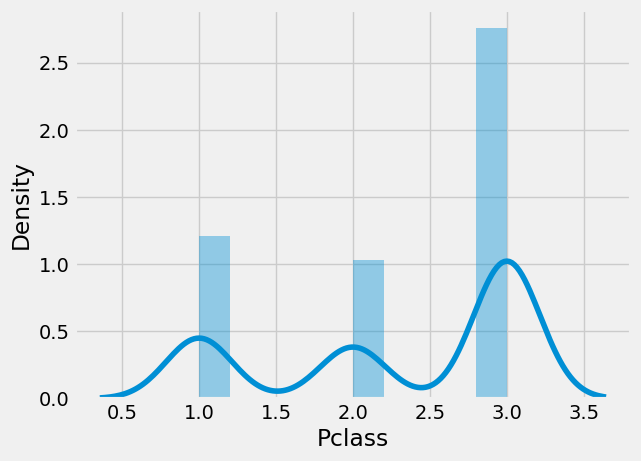

In [ ]:
# .distplot tells us the distribution of a feature.
sns.distplot(train['Pclass'])

In [ ]:
# How many missing values are there in Pclass
train['Pclass'].isnull().sum()

0

In [ ]:
df_dis['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [ ]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3


df_con 
    Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3


In [ ]:
# FEATURE 3: Name
# Description: The name of the passenger.

In [ ]:
# How many different names are there?
train['Name'].value_counts()[:15]      #--> This can be used to view the different types of names (here we are taking the first 15).
#train['Name'].count()                  --> This is required only if you want to get the total number of names.

# Note: Because of so many different names we won't be using the name variable

Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Leitch, Miss. Jessie Wills                         1
Johnson, Mr. Alfred                                1
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")       1
Taussig, Miss. Ruth                                1
Name: Name, dtype: int64

male      577
female    314
Name: Sex, dtype: int64


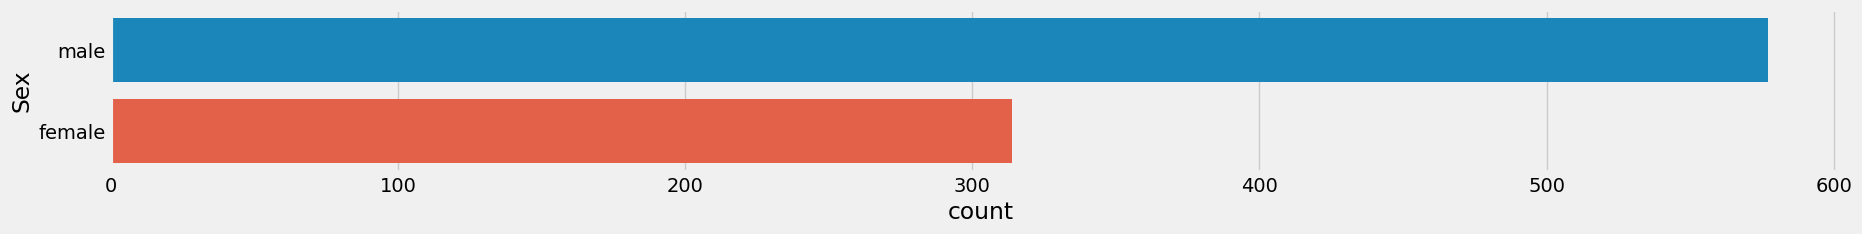

In [ ]:
plt.figure(figsize=(20,2))
sns.countplot(y='Sex',data=train)
print(train['Sex'].value_counts())

In [ ]:
# Are there any missing values?
train['Sex'].isnull().sum()
#train['Sex'].isnull().any()            --> This will give a boolean answer.

0

In [ ]:
# Add the Sex column to our df_dis dataframe.
df_dis['Sex'] = train['Sex']

# Now we will assign the female values in the df_dis dataframe the values 1 and the males 0.
df_dis['Sex'] = np.where(df_dis['Sex'] == 'female',1,0)

# Add the Sex column to our df_con dataframe.
df_con['Sex'] = train['Sex']

In [ ]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())


df_dis 
    Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0


df_con 
    Survived  Pclass     Sex
0         0       3    male
1         1       1  female
2         1       3  female
3         1       1  female
4         0       3    male


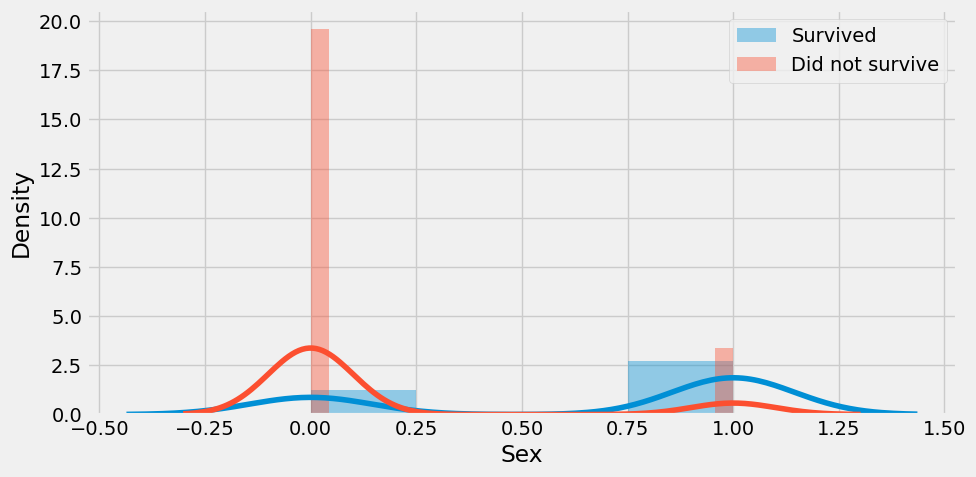

In [ ]:
# Now let us compare the sex variable with the survival variable and see how it looks.
# This can be done because both are binarys (0 or 1).
fig = plt.figure(figsize=(10,5))
sns.distplot(df_dis.loc[df_dis['Survived'] == 1]['Sex'], label= 'Survived')
sns.distplot(df_dis.loc[df_dis['Survived'] == 0]['Sex'], label= 'Did not survive')
plt.legend()
plt.show()

In [ ]:
# So from the above plot one thing we can understand is that, if you are a male on board the Titanic then your chances or survival is less. As it is seen that not most of the people survived but of those who did, more are females.

In [ ]:
# FEATURE 5: Age
# Description: The age of each passenger.

In [ ]:
# How many missing values are there in the Age column
train['Age'].isnull().sum()

177

In [ ]:
# Out of a total of 891, 177 values are missing from the age column.

# How will we fill in these missing values?
# What will filling with mean do?
# Can we remove those rows completely?

In [ ]:
# FEATURE 6: SibSp
# Description: The number of siblings or spouses aboard the Titanic.

In [ ]:
# How many missing values are there in SibSp
train['SibSp'].isnull().sum()

0

In [ ]:
# What values are present?
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
# Add SibSp to our sbset dataframes
df_dis['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [ ]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp
0         0       3    0      1
1         1       1    1      1
2         1       3    1      0
3         1       1    1      1
4         0       3    0      0


df_con 
    Survived  Pclass     Sex  SibSp
0         0       3    male      1
1         1       1  female      1
2         1       3  female      0
3         1       1  female      1
4         0       3    male      0


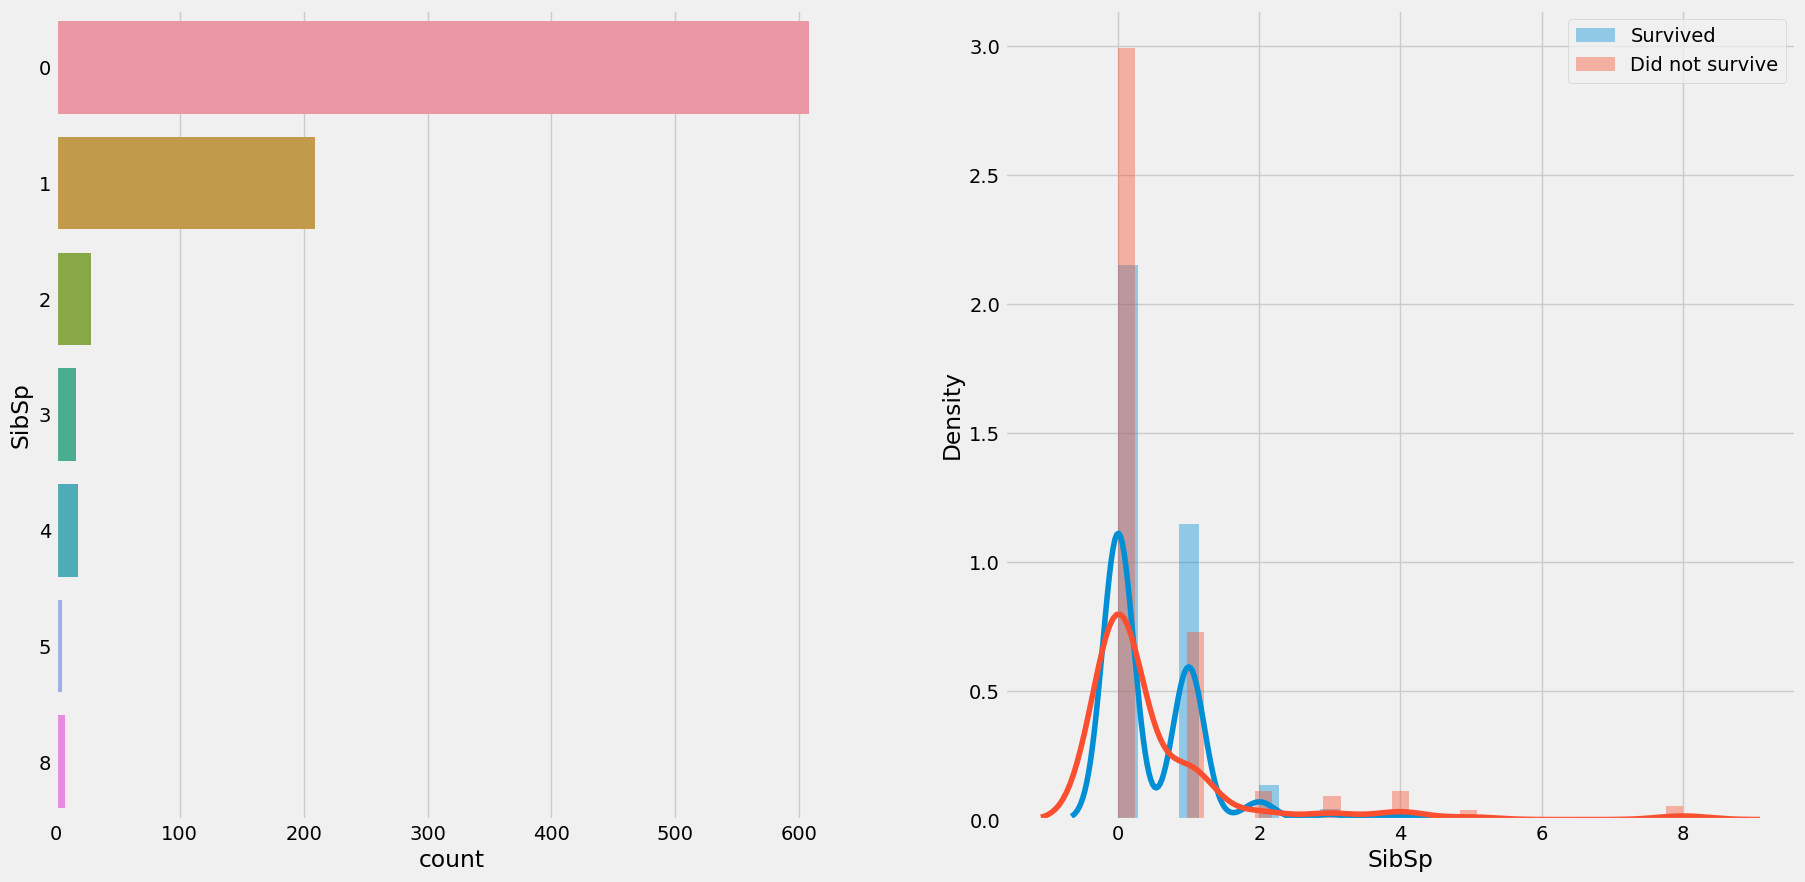

In [ ]:
# Plot counts and distributions of Survived and SibSp variables side by side.
fig = plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
sns.countplot(y= 'SibSp', data= train)

plt.subplot(1,2,2)
sns.distplot(df_dis.loc[df_dis['Survived'] == 1]['SibSp'], label= 'Survived')
sns.distplot(df_dis.loc[df_dis['Survived'] == 0]['SibSp'], label= 'Did not survive')

plt.legend()
plt.show()

In [ ]:

# We can see that the graph on the right is a count plot.

# The graph on the left has more story to tell us.

# Here, those passengers who came alone had a low chance of survival (because of the ratio difference).
# But the passengers with one sibling or spouse has a higher chance of survival. This can be because if you had a wife onboard, your chances of survival can be high.

In [ ]:
# FEATURE 7: Parch
# Description: The number of parents or children on board the Titanic.

# Since this is similar to SibSp, we will do a similar analysis.

In [ ]:
# Is there any missing values are there in Parch
train['Parch'].isnull().any()


False

In [ ]:
# What values are present?
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
# Add Parch to our sbset dataframes
df_dis['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [ ]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch
0         0       3    0      1      0
1         1       1    1      1      0
2         1       3    1      0      0
3         1       1    1      1      0
4         0       3    0      0      0


df_con 
    Survived  Pclass     Sex  SibSp  Parch
0         0       3    male      1      0
1         1       1  female      1      0
2         1       3  female      0      0
3         1       1  female      1      0
4         0       3    male      0      0


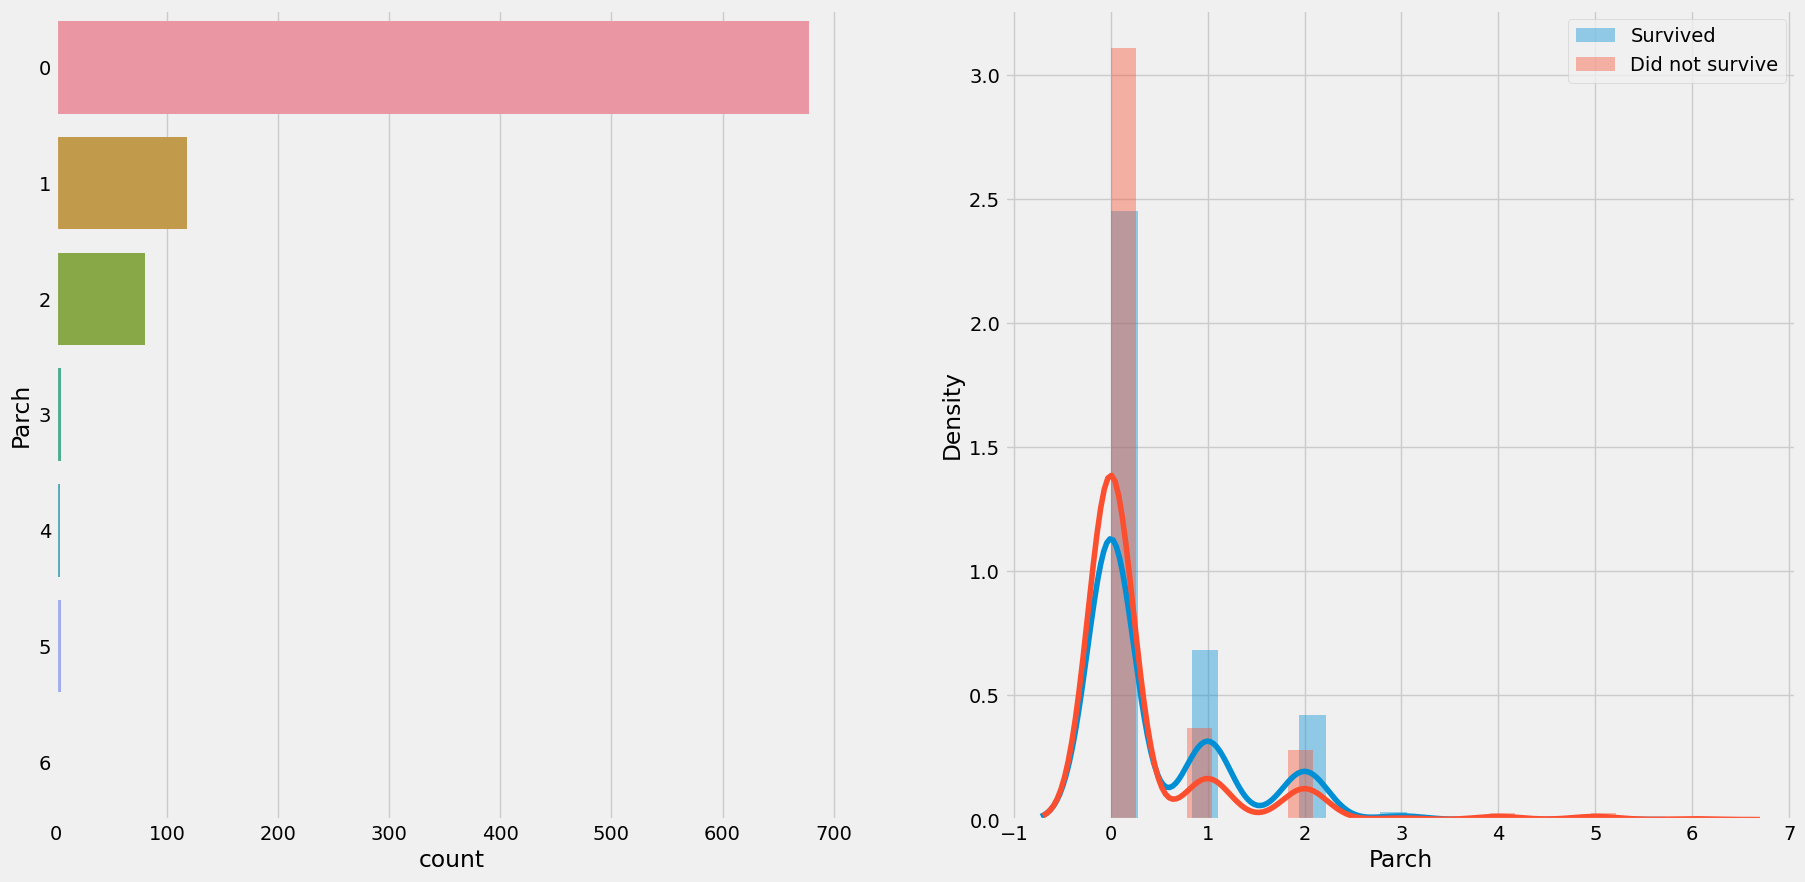

In [ ]:
# Plot counts and distributions of Survived and Parch variables side by side.
fig = plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
sns.countplot(y= 'Parch', data= train)

plt.subplot(1,2,2)
sns.distplot(df_dis.loc[df_dis['Survived'] == 1]['Parch'], label= 'Survived')
sns.distplot(df_dis.loc[df_dis['Survived'] == 0]['Parch'], label= 'Did not survive')

plt.legend()
plt.show()

In [ ]:
# How many missing values are there in Ticket
train['Ticket'].isnull().sum()

0

In [ ]:
# *Now this is hard to understand as there are many tickets. So we will look at a better way to view them.*

In [ ]:
# How many different kinds of tickets did the passengers have?
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
# So there is a total of 681 different tickets. Since this is too big we wont be using them in our subset dataframes.

In [ ]:
# FEATURE 9: Fare
# Description: The cost of each ticket.

In [ ]:
# How many missing values are there in Fare
train['Fare'].isnull().sum()

0

In [ ]:
# What kind of variable is Fare?
train['Fare'].dtype

dtype('float64')

In [ ]:
# How many unique kinds of Fares were there?
len(train['Fare'].unique())

248

In [ ]:
# There are 248 unique Fare types.
# Since our Fare is a float, let's add it to our continuous subset dataframe. But to add to the categorical subset dataframe we will be cutting it to bins.

In [ ]:
# Add Fare to our sbset dataframes
df_con['Fare'] = train['Fare']                  # --> Continuous

df_dis['Fare'] = pd.cut(train['Fare'], bins= 4)  # --> Discretised

In [ ]:
# Here we cut the Fare in discretised dataframe to equal bins using pd.cut*

In [ ]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch               Fare
0         0       3    0      1      0  (-0.512, 128.082]
1         1       1    1      1      0  (-0.512, 128.082]
2         1       3    1      0      0  (-0.512, 128.082]
3         1       1    1      1      0  (-0.512, 128.082]
4         0       3    0      0      0  (-0.512, 128.082]


df_con 
    Survived  Pclass     Sex  SibSp  Parch     Fare
0         0       3    male      1      0   7.2500
1         1       1  female      1      0  71.2833
2         1       3  female      0      0   7.9250
3         1       1  female      1      0  53.1000
4         0       3    male      0      0   8.0500


In [ ]:
# Here we can see that the fares for the discretised dataframe is between intervals. But there are negative values which can mean that there might be outliers that we might need to remove.

# In the continuous dataframe we can see the fare exactly as it is.

In [ ]:
df_dis['Fare'].value_counts()

(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare, dtype: int64

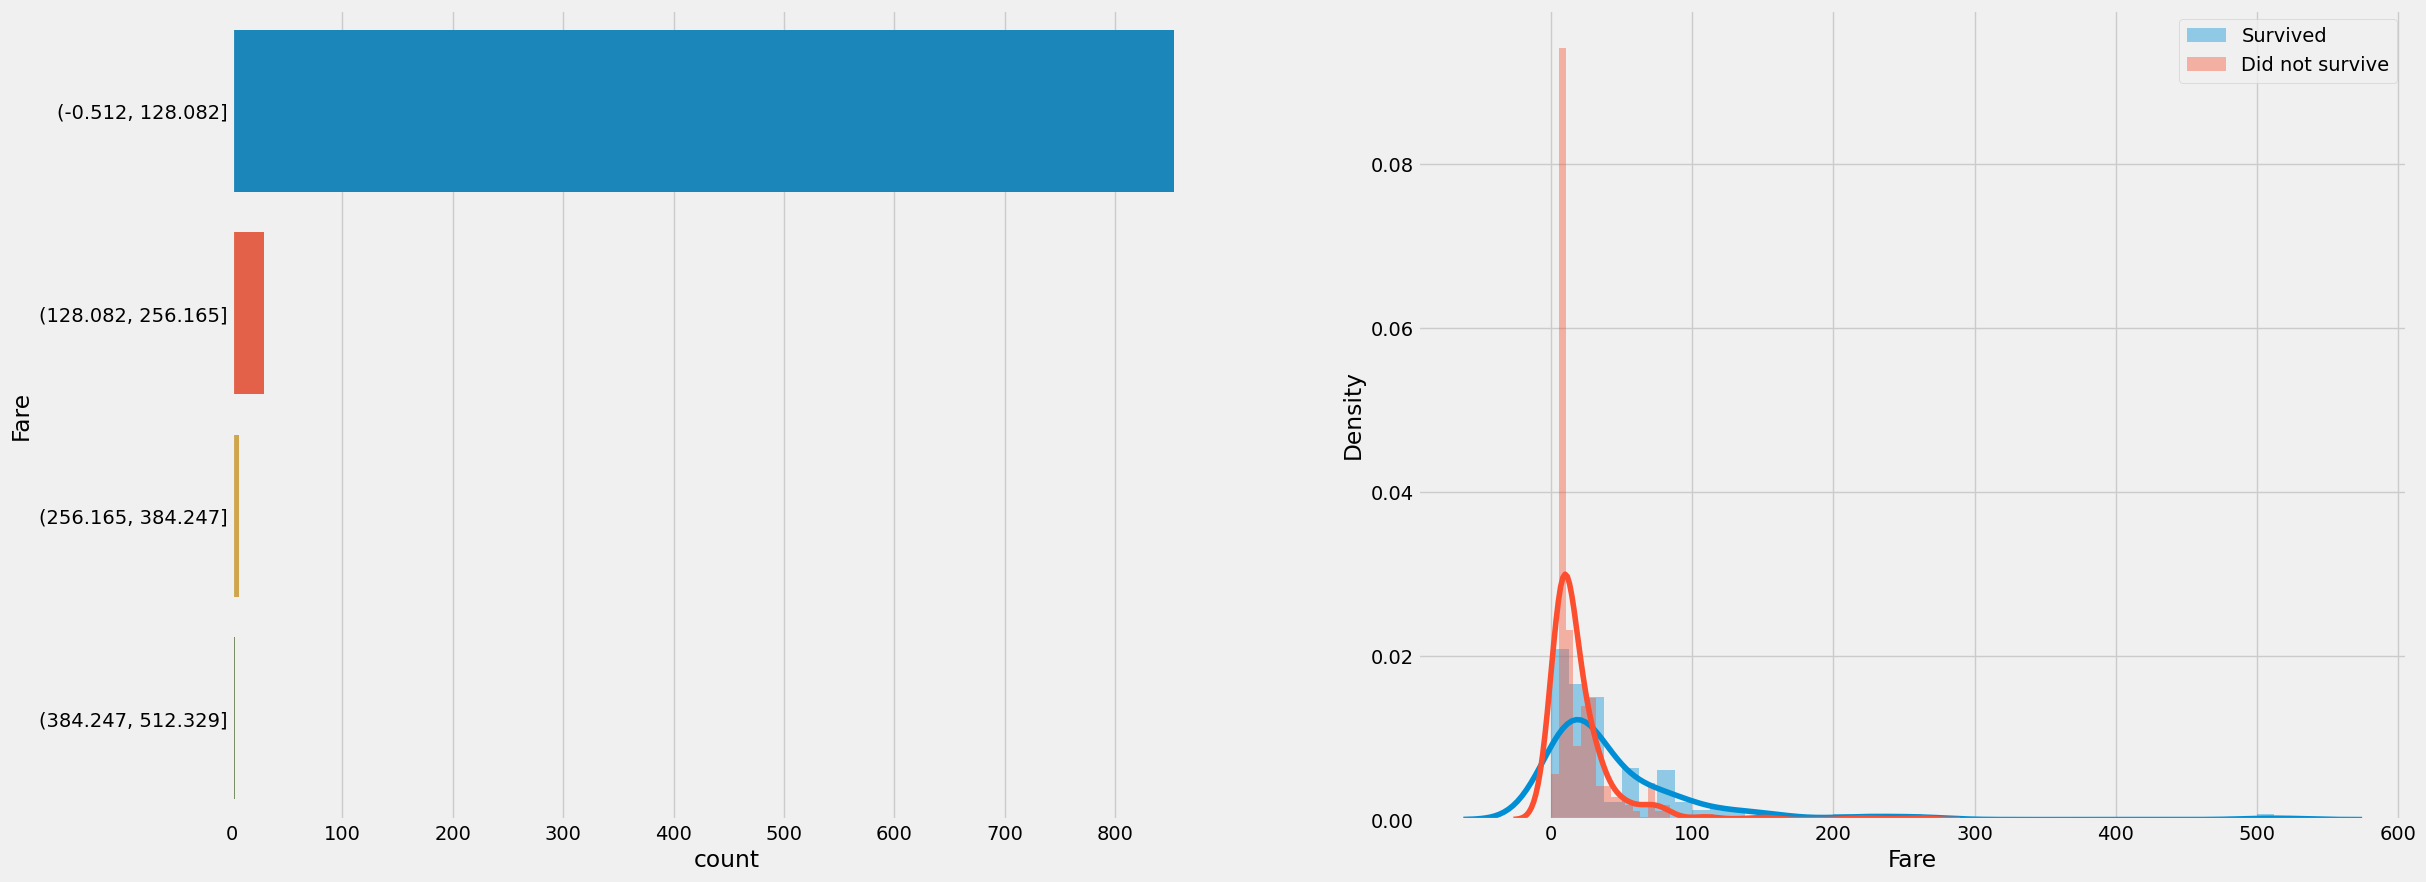

In [ ]:
# Plot counts and distributions of Survived and Fare variables side by side.
fig = plt.figure(figsize= (25,10))

plt.subplot(1,2,1)
sns.countplot(y= 'Fare', data= df_dis)

plt.subplot(1,2,2)
sns.distplot(train.loc[train['Survived'] == 1]['Fare'], label= 'Survived')
sns.distplot(train.loc[train['Survived'] == 0]['Fare'], label= 'Did not survive')

plt.legend()
plt.show()

In [ ]:
# It looks like there is a more chance of survival for people whose fare charges was close to 100.
# Initially we kept the bins at 5, but then since there was a bin where no value was there we reduced it. So what we did was a trial and error method and chose 4. We can also choose 3 but since both the plots looked similar to me, I went with 4.

In [ ]:
# FEATURE 9: Cabin
# Description: The cabin number of each passenger.

In [ ]:
# Are there any missing values in the Cabin column
train['Cabin'].isnull().any()

True

In [ ]:
# How many missing values are there in Cabin
train['Cabin'].isnull().sum()

687

In [ ]:
# What are the different kinds of Cabins?
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
# Since there are too many missing values we wont be using the Cabin column for our initial model. Thus, we wont be adding them to the subset dataframes as well.

In [ ]:
# FEATURE 10: Embarked
# Description: The port where each passenger boarded the Titanic.

# Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# How many missing values are there in Embarked
train['Embarked'].isnull().sum()

2

In [ ]:
# What are the different values in Embarked?
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='count', ylabel='Embarked'>

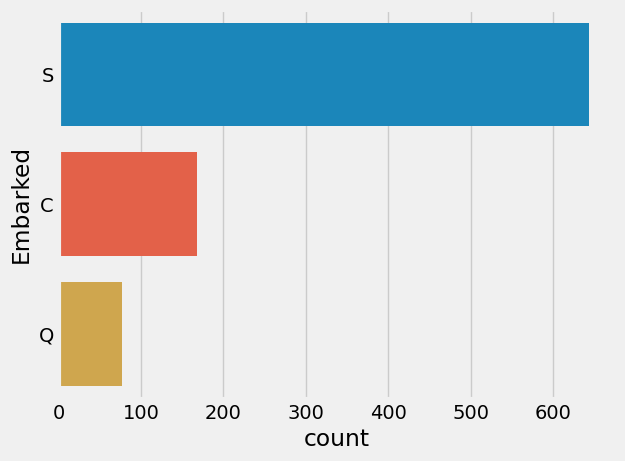

In [ ]:
# Viewing the counts
sns.countplot(y= 'Embarked', data= train)

In [ ]:
# Add embarked to the sub dataframes
df_con['Embarked'] = train['Embarked']
df_dis['Embarked'] = train['Embarked']
# Remove the missing values.
df_con.dropna(subset= ['Embarked'],inplace= True)
df_dis.dropna(subset= ['Embarked'],inplace= True)

In [ ]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 128.082]        S
1         1       1    1      1      0  (-0.512, 128.082]        C
2         1       3    1      0      0  (-0.512, 128.082]        S
3         1       1    1      1      0  (-0.512, 128.082]        S
4         0       3    0      0      0  (-0.512, 128.082]        S


df_con 
    Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
0         0       3    male      1      0   7.2500        S
1         1       1  female      1      0  71.2833        C
2         1       3  female      0      0   7.9250        S
3         1       1  female      1      0  53.1000        S
4         0       3    male      0      0   8.0500        S


In [ ]:
# 3. Feature Encoding
# Now since our two sub dataframes are ready, we can feature encode them so that they are ready for our machine learning models.

# We will encode our bin dataframe (df_dis) with "One-Hot Encoding" and our continuous dataframe (df_con) with "Label Encoding".
# *Discretised Dataframe*

In [ ]:
df_dis.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 128.082]",S
1,1,1,1,1,0,"(-0.512, 128.082]",C
2,1,3,1,0,0,"(-0.512, 128.082]",S
3,1,1,1,1,0,"(-0.512, 128.082]",S
4,0,3,0,0,0,"(-0.512, 128.082]",S


In [ ]:
# One hot encoding is giving a 0 for what the value isnt and a 1 for what it is.

In [ ]:
# One Hot Encoded df_dis variables
one_hot_cols = df_dis.columns.tolist()
one_hot_cols.remove('Survived')                            # --> Here we remove Survived because we dont need encode this.
df_dis_enc = pd.get_dummies(df_dis, columns= one_hot_cols)

df_dis_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 128.082]","Fare_(128.082, 256.165]","Fare_(256.165, 384.247]","Fare_(384.247, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# *Continuous Dataframe*

In [ ]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [ ]:
# Label Encoded using LabelEncoder()
df_con_enc = df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2
5,0,2,1,0,0,51,1
6,0,0,1,0,0,186,2
7,0,2,1,3,1,124,2
8,1,2,0,0,2,74,2
9,1,1,0,1,0,154,0


In [ ]:
# 4. Start Building Maching Learning Models
# Before running a ML model our aim was to turn all values to numbers. We will now run a series of machine learning algorithm to see which will yield the best results.

# Let's seperate the data

In [ ]:
# For our simplicity we will be using the continuous dataframe.
selected_df = df_con_enc

In [ ]:
# Split the dataframe into features (predictive variables) and labels (target variable).
X_train = selected_df.drop('Survived', axis= 1)      # --> Features
y_train = selected_df['Survived']                    # --> Label

In [ ]:
X_train.head()


,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# In any model building, we mainly focus on 3 main steps:

# Fitting the model and finding the accuracy (accuracy score) of the fitted model.
# Perform K-Fold Cross Validation (K needs to be specified).
# Find the accuracy of the Cross Validation.
# We will be running a whole bunch of models to figure out which model is best suited for our data.

In [ ]:
# Model 1: Logistic Regression

In [ ]:
start_time = time.time()
algorithm = LogisticRegression()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
log_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
log_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
log_acc_cv = round(metrics.accuracy_score(y_train, log_train_pred)*100, 2)

log_time = (time.time()- start_time)

In [ ]:
# Logistic Regression
print('Accuracy of the model is: ', log_acc)
print('Accuracy of 10-Fold CV is: ', log_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= log_time))

Accuracy of the model is:  79.42
Accuracy of 10-Fold CV is:  78.18
Running time is:  0:00:04.897417


In [ ]:
# Model 2: K-Nearest Neighbours

In [ ]:
start_time = time.time()
algorithm = KNeighborsClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
knn_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
knn_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
knn_acc_cv = round(metrics.accuracy_score(y_train, knn_train_pred)*100, 2)

knn_time = (time.time()- start_time)

In [ ]:
# K-Nearest Neighbours
print('Accuracy of the model is: ', knn_acc)
print('Accuracy of 10-Fold CV is: ', knn_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= knn_time))

Accuracy of the model is:  80.54
Accuracy of 10-Fold CV is:  74.02
Running time is:  0:00:00.433581


In [ ]:
# Model 3: Gaussian Naive Bayes

In [ ]:
start_time = time.time()
algorithm = GaussianNB()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
gnb_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
gnb_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
gnb_acc_cv = round(metrics.accuracy_score(y_train, gnb_train_pred)*100, 2)

gnb_time = (time.time()- start_time)

In [ ]:
# Gaussian Naive Bayes
print('Accuracy of the model is: ', gnb_acc)
print('Accuracy of 10-Fold CV is: ', gnb_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= gnb_time))

Accuracy of the model is:  76.72
Accuracy of 10-Fold CV is:  76.38
Running time is:  0:00:00.184578


In [ ]:
# Model 4: Decision Tree Classifier

In [ ]:
start_time = time.time()
algorithm = DecisionTreeClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
dt_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
dt_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
dt_acc_cv = round(metrics.accuracy_score(y_train, dt_train_pred)*100, 2)

dt_time = (time.time()- start_time)

In [ ]:
#  Decision Tree Classifier
print('Accuracy of the model is: ', dt_acc)
print('Accuracy of 10-Fold CV is: ', dt_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= dt_time))

Accuracy of the model is:  92.46
Accuracy of 10-Fold CV is:  79.75
Running time is:  0:00:00.175474


In [ ]:
# Model 5: Gradient Boost Trees

In [ ]:
start_time = time.time()
algorithm1 = GradientBoostingClassifier()

## Step 1:
model = algorithm1.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
gbt_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
gbt_train_pred = model_selection.cross_val_predict(algorithm1, X_train, y_train, cv= 10)

## Step 3:  --> Cross Validation accuracy metric.
gbt_acc_cv = round(metrics.accuracy_score(y_train, gbt_train_pred)*100, 2)

gbt_time = (time.time()- start_time)

In [ ]:
#  Gradient Boost Trees
print('Accuracy of the model is: ', gbt_acc)
print('Accuracy of 10-Fold CV is: ', gbt_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= gbt_time))

Accuracy of the model is:  86.39
Accuracy of 10-Fold CV is:  81.1
Running time is:  0:00:03.324670


In [ ]:
# Model Results
# Now let's see which model has the best cross-validation accuracy.

# NOTE: We care more about the accuracy of cross validation, as the metrics we get from the model can randomly score higher than usual.

In [ ]:
cv_models = pd.DataFrame({'Model':[' Logistic Regression', 'K-Nearest Neighbours', 'Gaussian Naive Bayes',
                                'Decision Tree Classifier', 'Gradient Boost Trees'],
                      'Score':[log_acc_cv, knn_acc_cv, gnb_acc_cv, dt_acc_cv, gbt_acc_cv]})

print('Cross-Validation Accuracy Scores')
cv_models.nlargest(5,'Score')

Cross-Validation Accuracy Scores


,Model,Score
4,Gradient Boost Trees,81.10
3,Decision Tree Classifier,79.75
0,Logistic Regression,78.18
2,Gaussian Naive Bayes,76.38
1,K-Nearest Neighbours,74.02


In [ ]:
# Feature Importance
# According to our model which were the features that impacted the survival of passengers onboard Titanic.

In [ ]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col':data.columns})
    fea_imp = fea_imp.nsmallest(10,'imp')
    visual = fea_imp.plot(kind= 'barh', x= 'col', y= 'imp', figsize=(20,10))
    return fea_imp

,imp,col
5,0.021509,Embarked
2,0.022385,SibSp
3,0.033747,Parch
0,0.149970,Pclass
4,0.246589,Fare
1,0.525800,Sex


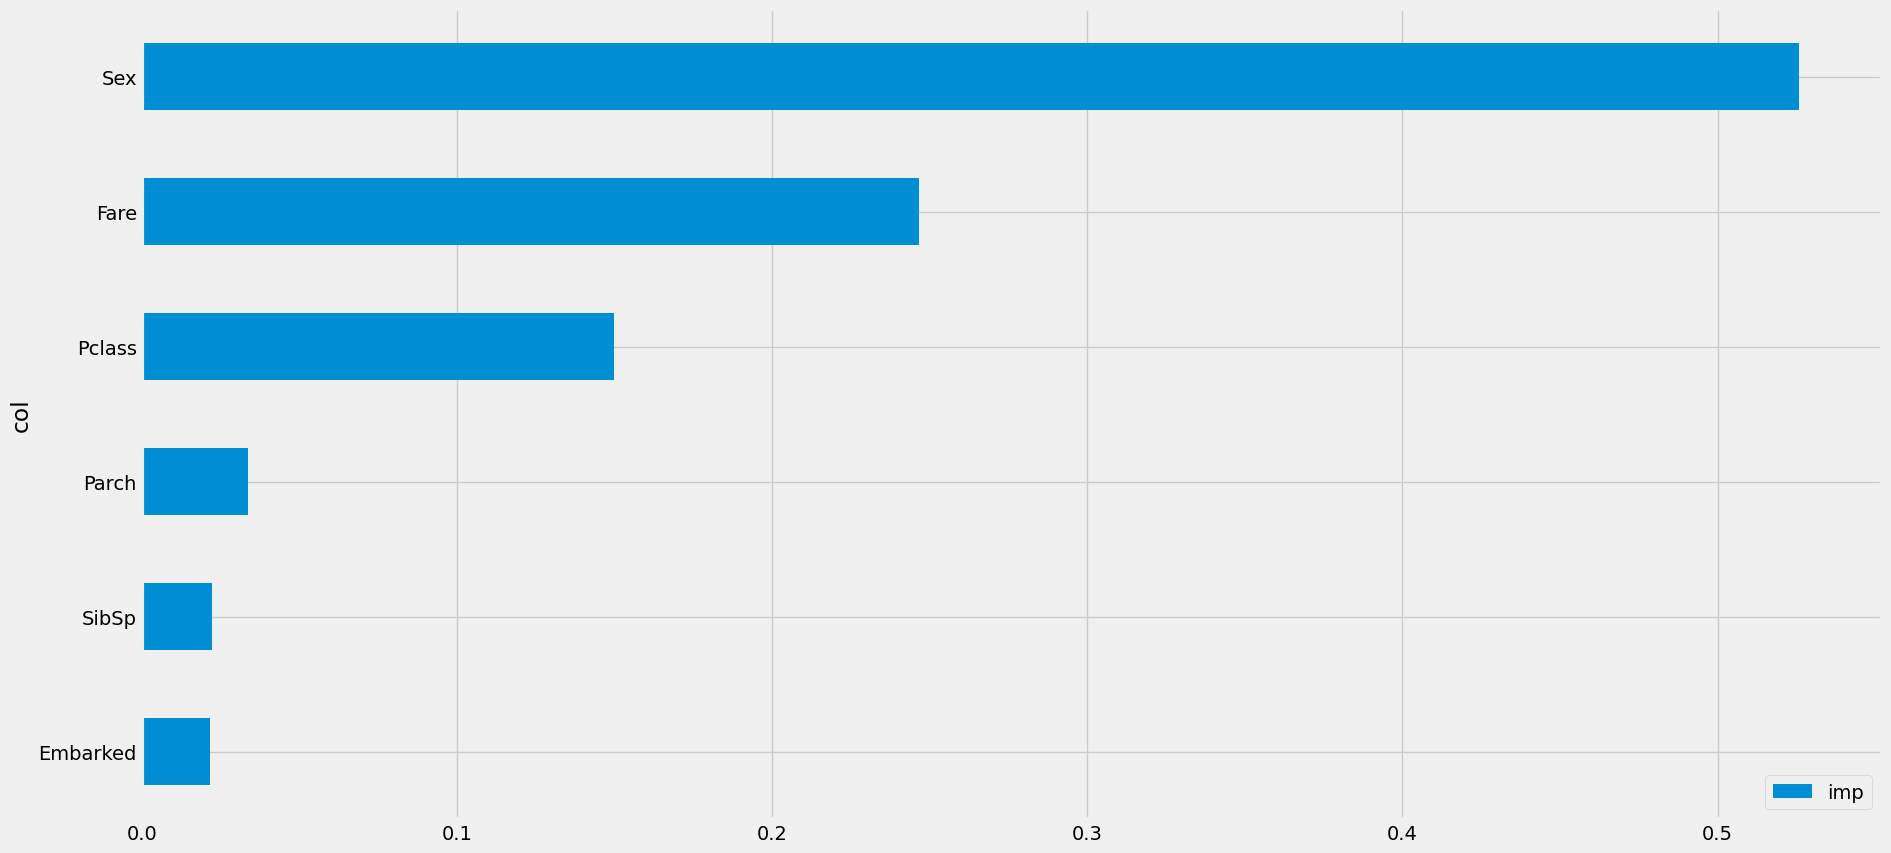

In [ ]:
feature_importance(algorithm1, X_train)

In [ ]:
# Why would you want feature importance?
# Feature importance shows how much each feature contributed to the model.

# We could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

# Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

In [ ]:
# 5. Precision and Recall
# Precision and Recall are metrics that you use when you have an imbalanced classification problem.

# Recall - a metric which measures a models ability to find all relevant cases in a dataset.
# Precision - a metric which measures a models ability to correctly identify only relevant cases.
# Combining Precision and Recall gives us the F1 score.

# They fall between 0 and 1, with 1 being better.

In [ ]:
# Recall = TP/(TP + FN)

# Here the Recall is pretty low. This means that there is a higher amount of False Negatives (predicting 'Did not survive' when it is actually 'Survived').
# Pression = TP/(TP + FP)

# Precision is high. Thus, we can say say that there is less false positives (predicting 'Survived' when it is actually 'Did not survived')

In [ ]:
# 6. Prediction on the Test dataset
# Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset.

# We want to make predictions on the same columnns our model is trained on.

# So we have to select the subset of right columns of the test dateframe, encode them and make a prediciton with our model.

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Create a list of columns to be used for predictions.
wanted_columns = X_train.columns
wanted_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
# Make predictions using Gradient Boost Trees model on wanted columns.
predictions = algorithm1.predict(test[wanted_columns].apply(LabelEncoder().fit_transform))

In [ ]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive).
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Create a dataframe and append the relevant colimns.
submission = pd.DataFrame()
submission['Passenger ID'] = test['PassengerId']
submission['Survived'] = predictions
submission.head(20)

,Passenger ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [ ]:
# What did our submission have to look like?
gender_submission.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
# Are our test and submission the same length?
if len(submission) == len(test):
    print('The submission and the test dataframes are of the same length')
else:
    print('Dataframes mismatched')

The submission and the test dataframes are of the same length


In [ ]:
# convert submission dataframe to csv.
submission.to_csv('final_submission.csv', index= False)
print('Submission csv is ready')

Submission csv is ready


In [ ]:
# Checking the final submission csv.
final_submission = pd.read_csv('final_submission.csv')
final_submission.head(20)

,Passenger ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0
